<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Pizza_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df= pd.read_csv("pizza_v2.csv")


In [3]:
df.head()


,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
df.isnull().sum()


company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
df.columns


Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [7]:
# Renaming the price column
df.rename({'price_rupiah':'price'}, axis=1, inplace=True)

# Extracting digits in price column and converting to integer
df.price = df.price.str.replace('Rp','').str.replace(',','').astype(int)

# Extracting digits in diameter and converting to integer
df['diameter'] = df['diameter'].str.extract('(\d+\.?\d*)').astype(float) 

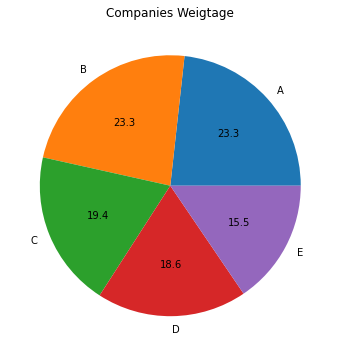

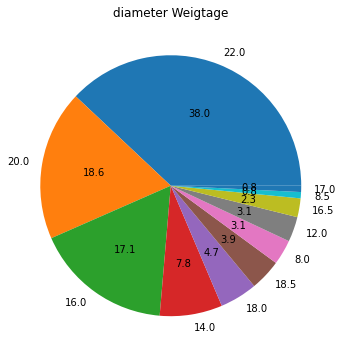

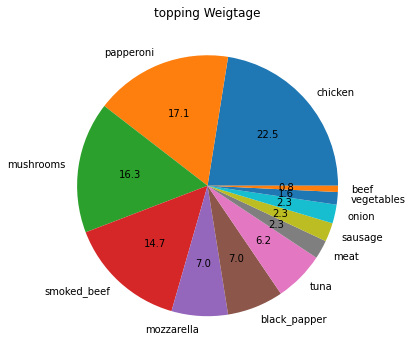

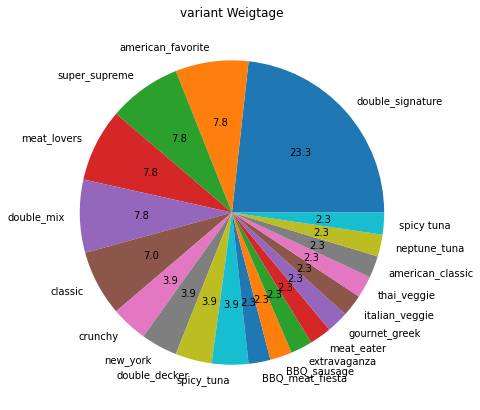

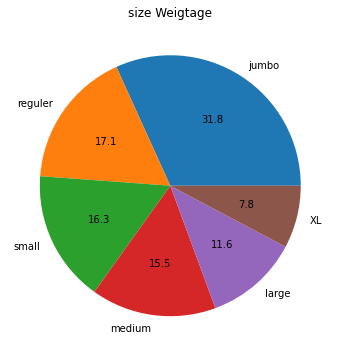

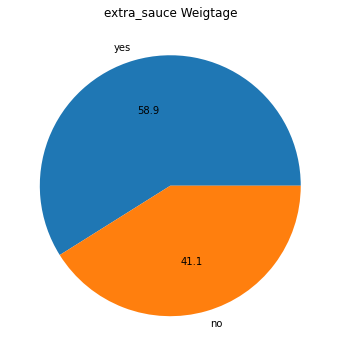

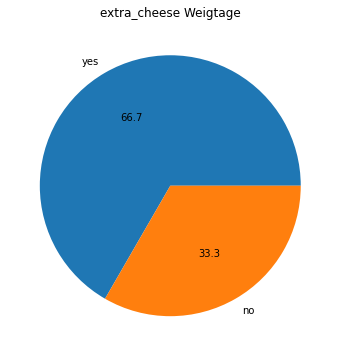

In [8]:
import plotly.express as px
plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),autopct='%.1f', labels= df['company'].unique())
plt.title('Companies Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['diameter'].value_counts(),autopct='%.1f', labels= df['diameter'].unique())
plt.title('diameter Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),autopct='%.1f', labels= df['topping'].unique())
plt.title('topping Weigtage')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['variant'].value_counts(),autopct='%.1f', labels= df['variant'].unique())
plt.title('variant Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),autopct='%.1f', labels= df['size'].unique())
plt.title('size Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_sauce'].value_counts(),autopct='%.1f', labels= df['extra_sauce'].unique())
plt.title('extra_sauce Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),autopct='%.1f', labels= df['extra_cheese'].unique())
plt.title('extra_cheese Weigtage')
plt.show()

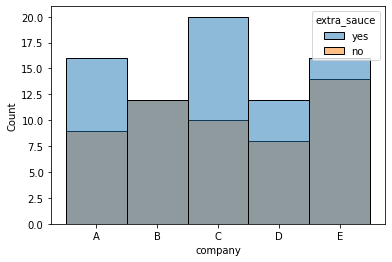

In [9]:
sns.histplot(data=df, x="company",hue='extra_sauce')


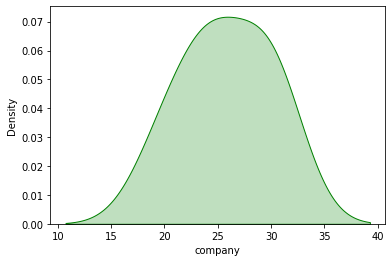

In [10]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(), color='g', shade=True)

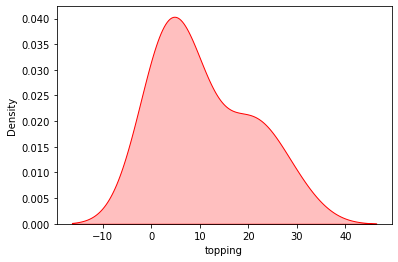

In [11]:
df_company=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)

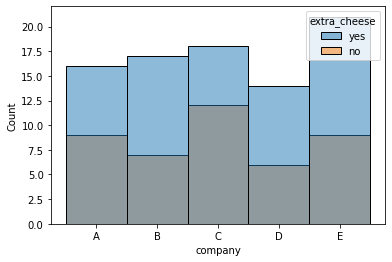

In [12]:
sns.histplot(data=df, x="company",hue='extra_cheese')


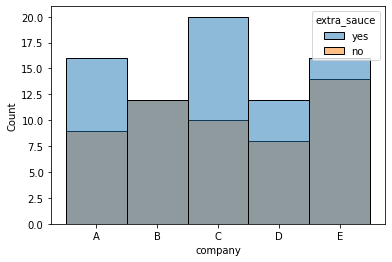

In [13]:
sns.histplot(data=df, x="company",hue='extra_sauce')


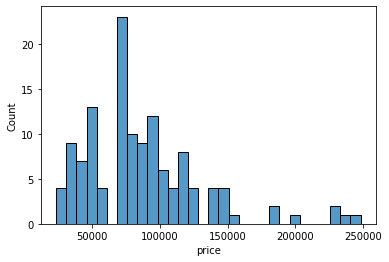

In [14]:
sns.histplot(data=df, x='price',bins=30)


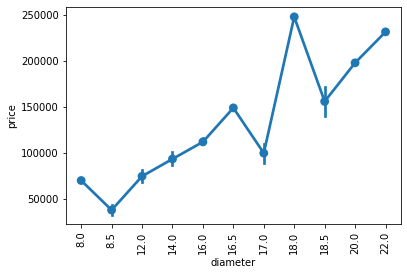

In [15]:
# Pizza Diameter vs mean Price
sns.pointplot(data=df.sort_values(by='diameter'),
              x='diameter', y='price')
plt.xticks(rotation=90);

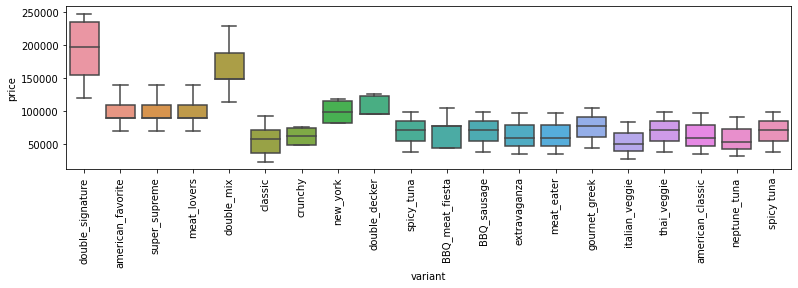

In [16]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

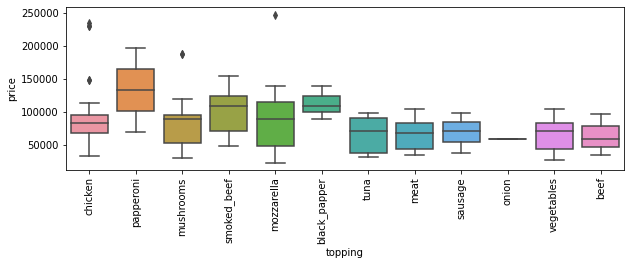

In [17]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=90)
plt.show()

In [20]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 8.5 MB/s 


In [21]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final
def one_hot(df, column):
    df = one_hot_encoding(df,column)
    return df

In [22]:
df = one_hot(df, 'company')
df = one_hot(df, 'topping')
df = one_hot(df, 'variant')
df = one_hot(df, 'size')
df = one_hot(df, 'extra_sauce')
df = one_hot(df, 'extra_cheese')

In [23]:

df = one_hot(df, 'extra_mushrooms')


In [24]:
df.head()


,company_A,company_B,company_C,company_D,company_E,price,diameter,topping_chicken,topping_papperoni,topping_mushrooms,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
0,1,0,0,0,0,235000,22.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,198000,20.0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,120000,16.0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,0,155000,14.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,0,0,0,0,248000,18.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [25]:
df.dtypes


company_A                      int64
company_B                      int64
company_C                      int64
company_D                      int64
company_E                      int64
price                          int64
diameter                     float64
topping_chicken                int64
topping_papperoni              int64
topping_mushrooms              int64
topping_smoked_beef            int64
topping_mozzarella             int64
topping_black_papper           int64
topping_tuna                   int64
topping_meat                   int64
topping_sausage                int64
topping_onion                  int64
topping_vegetables             int64
topping_beef                   int64
variant_double_signature       int64
variant_american_favorite      int64
variant_super_supreme          int64
variant_meat_lovers            int64
variant_double_mix             int64
variant_classic                int64
variant_crunchy                int64
variant_new_york               int64
v

In [26]:
x = df.drop("price",axis = 1)
y = df["price"]

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)


In [32]:
from sklearn.svm import SVR


In [33]:
svr= SVR()


In [35]:
svr.fit(X_train,Y_train)


SVR()

In [48]:
pred1= svr.predict(X_test)
